In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv("Churn(1).csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
for i in df.columns:
    print(i,"------>",df[i].unique())
    print("    ")

customerID ------> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
    
gender ------> ['Female' 'Male']
    
SeniorCitizen ------> [0 1]
    
Partner ------> ['Yes' 'No']
    
Dependents ------> ['No' 'Yes']
    
tenure ------> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
    
PhoneService ------> ['No' 'Yes']
    
MultipleLines ------> ['No phone service' 'No' 'Yes']
    
InternetService ------> ['DSL' 'Fiber optic' 'No']
    
OnlineSecurity ------> ['No' 'Yes' 'No internet service']
    
OnlineBackup ------> ['Yes' 'No' 'No internet service']
    
DeviceProtection ------> ['No' 'Yes' 'No internet service']
    
TechSupport ------> ['No' 'Yes' 'No internet service']
    
StreamingTV ------> ['No' 'Yes' 'No internet service']
    
StreamingMovies ------> ['No' 'Yes' 'No in

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 0, 'no.of churners')

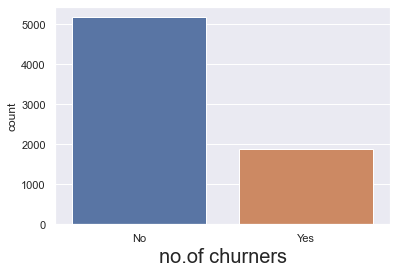

In [5]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df["Churn"])
plt.xlabel("no.of churners",fontsize=20)

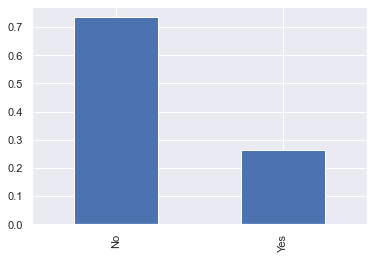

In [6]:
df["Churn"].value_counts(normalize=True).plot(kind="bar")

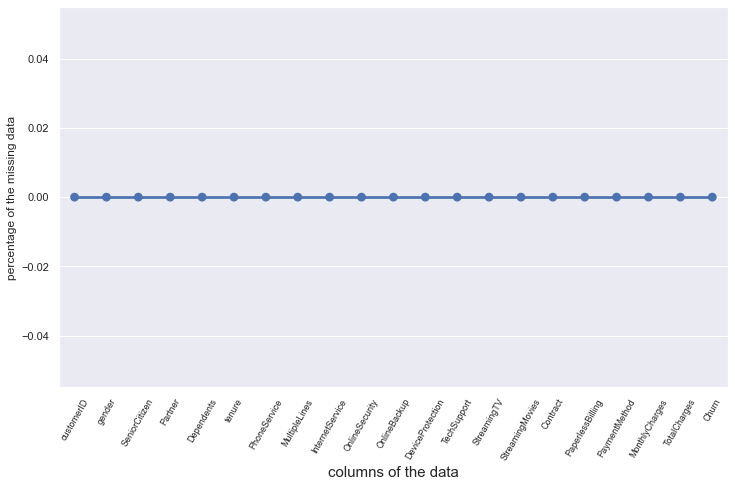

In [7]:
miss=(df.isnull().mean()).reset_index()
plt.figure(figsize=(12,7))
sns.pointplot(x="index",y=0,data=miss)
plt.xticks(rotation=60,fontsize=9)
plt.xlabel("columns of the data",fontsize=15)
plt.ylabel("percentage of the missing data")
plt.show()

In [8]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

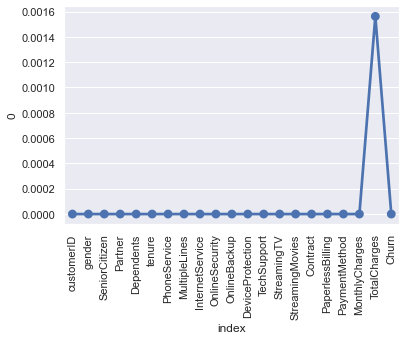

In [9]:
m=(df.isnull().mean()).reset_index()
sns.pointplot(x="index",y=0,data=m)
plt.xticks(rotation=90)
plt.show()

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.drop(df[df["TotalCharges"].isnull()==True].index,inplace=True)

In [12]:
df.tenure.max()

72

In [13]:
df_train=df.copy()

In [14]:
l=[f"{i}-{i+11}" for i in range(1,72,12)]

In [15]:
l

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [16]:
pd.cut(df.tenure,range(1,75,12,),right=False)

0        [1, 13)
1       [25, 37)
2        [1, 13)
3       [37, 49)
4        [1, 13)
          ...   
7038    [13, 25)
7039    [61, 73)
7040     [1, 13)
7041     [1, 13)
7042    [61, 73)
Name: tenure, Length: 7032, dtype: category
Categories (6, interval[int64]): [[1, 13) < [13, 25) < [25, 37) < [37, 49) < [49, 61) < [61, 73)]

In [17]:
df["tenure_bins"]=pd.cut(df.tenure,range(1,80,12,),labels=l,right=False)

In [18]:
df.tenure_bins.value_counts()

1-12     2175
61-72    1407
13-24    1024
49-60     832
25-36     832
37-48     762
Name: tenure_bins, dtype: int64

In [19]:
df.tenure_bins.dtype

CategoricalDtype(categories=['1-12', '13-24', '25-36', '37-48', '49-60', '61-72'], ordered=True)

In [20]:
df.drop(["tenure","customerID"],axis=1,inplace=True)

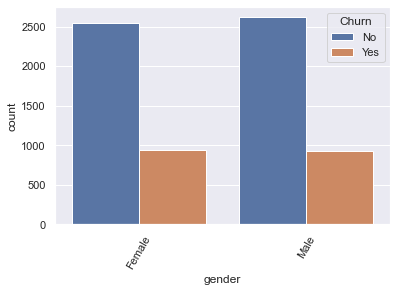

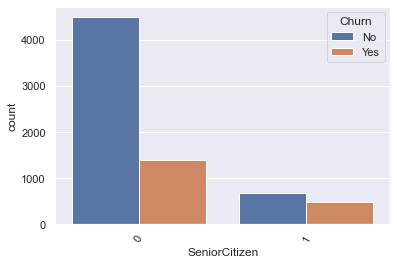

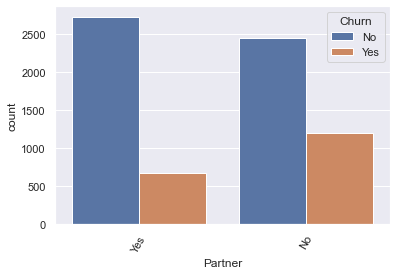

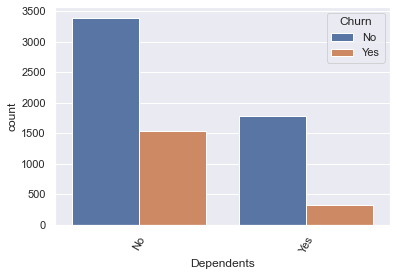

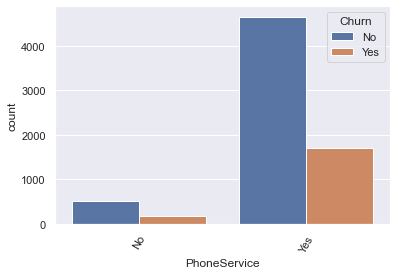

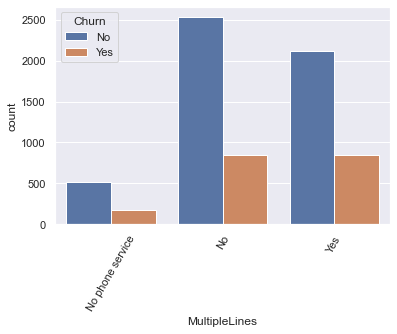

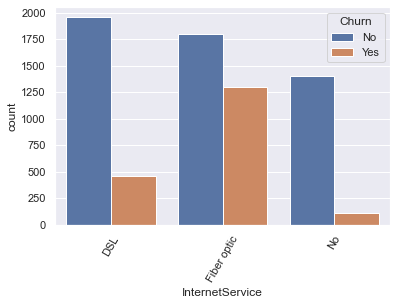

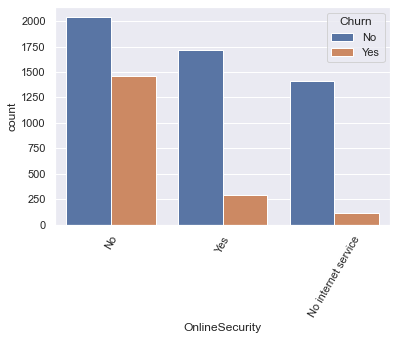

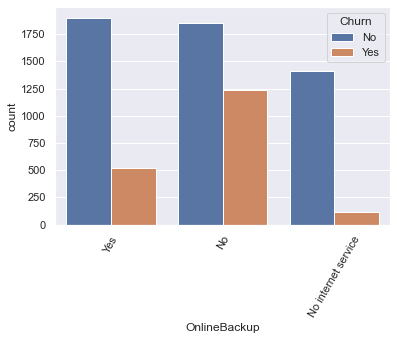

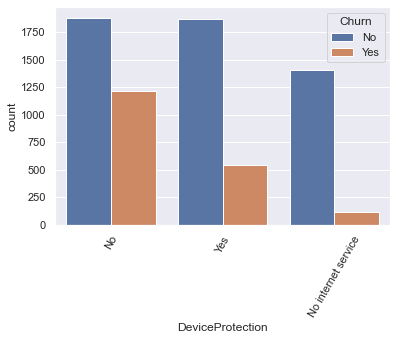

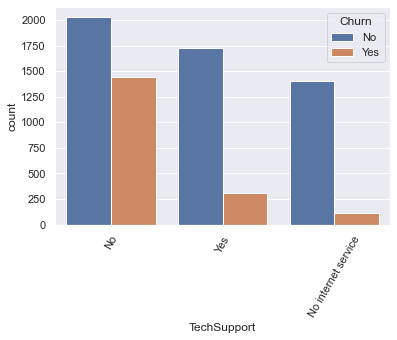

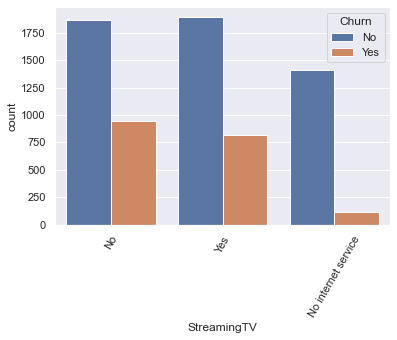

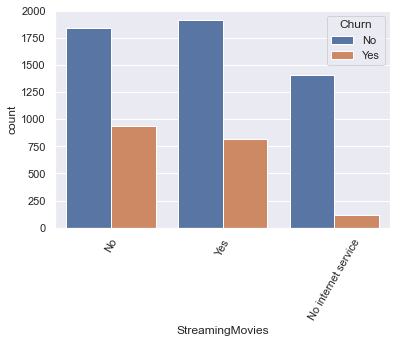

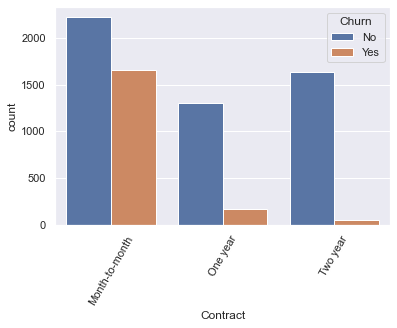

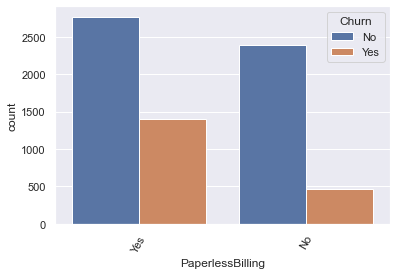

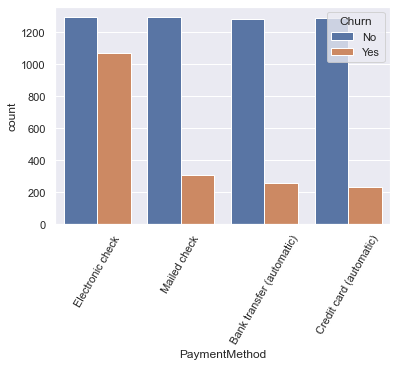

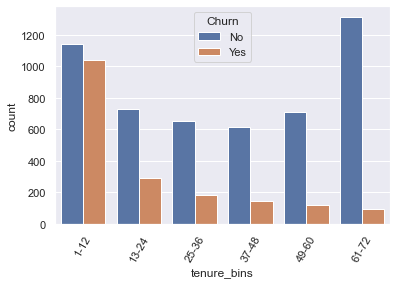

In [21]:
for i,column in enumerate(df.drop(columns=["Churn","TotalCharges","MonthlyCharges"])):
    plt.figure(i)
    sns.countplot(data=df,x=column,hue="Churn")
    plt.xticks(rotation=60)

In [22]:
df["Churn"]=np.where(df["Churn"]=="Yes",1,0)

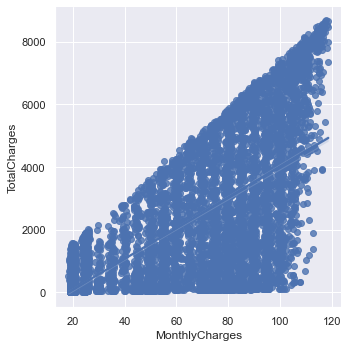

In [23]:
sns.lmplot(data=df,x="MonthlyCharges",y="TotalCharges")

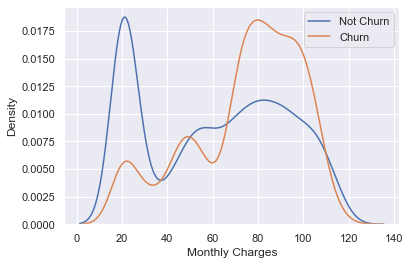

In [24]:
t=sns.kdeplot(df.MonthlyCharges[df["Churn"]==0],label="Not Churn")
t=sns.kdeplot(df.MonthlyCharges[df["Churn"]==1],label="Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()

In [25]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [28]:
for i in x.columns:
    if x[i].dtype=="O":
        x[i]=x[i].astype("category")

In [29]:
category=x.select_dtypes(include="category")
numeric=x.select_dtypes(exclude="category")

In [30]:
category.replace({"Yes":1,"No":0,"No phone service":1,"Male":1,"Female":0,"No internet service":1,"DSL":1,"Fiber optic":2},
                 inplace=True)
category["Contract"].replace({"Month-to-month":3,"One year":2,"Two year":1},inplace=True)
category["PaymentMethod"].replace({"Electronic check":4,"Mailed check":3,'Bank transfer (automatic)':2,'Credit card (automatic)':1},inplace=True)
category["tenure_bins"].replace({"1-12":6,"13-24":5,"25-36":4,"37-48":3,"49-60":2,"61-72":1},inplace=True)

C:\Users\lavak\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\lavak\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
numeric

,SeniorCitizen,MonthlyCharges,TotalCharges
0,0,29.85,29.85
1,0,56.95,1889.50
2,0,53.85,108.15
3,0,42.30,1840.75
4,0,70.70,151.65
...,...,...,...
7038,0,84.80,1990.50
7039,0,103.20,7362.90
7040,0,29.60,346.45
7041,1,74.40,306.60


In [32]:
df_clean=pd.concat([numeric,category,y],axis=1)

In [33]:
df_clean.to_csv("cleaned_data.csv",index=False)

In [34]:
#plt.figure(figsize=(15,7))
#df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

In [35]:
#plt.figure(figsize=(16,9))
#sns.heatmap(df_dummies.corr(),cmap="Paired")

In [36]:
churn_df_yes=df.loc[df["Churn"]==1]
churn_df_no=df.loc[df["Churn"]==0]

In [37]:
def uniplot(df,col,title,hue=None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue)
    plt.show()

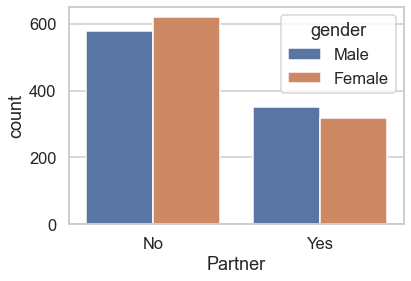

In [38]:
uniplot(churn_df_yes,"Partner","patner",hue="gender")

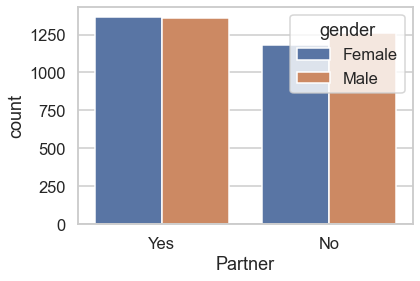

In [39]:
uniplot(churn_df_no,"Partner","patner",hue="gender")

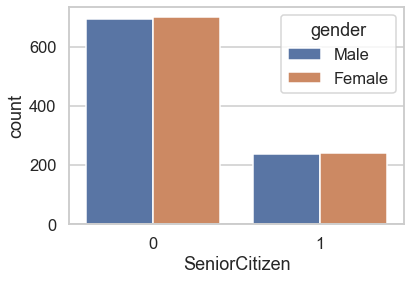

In [40]:
uniplot(churn_df_yes,"SeniorCitizen","senior citizen",hue="gender")

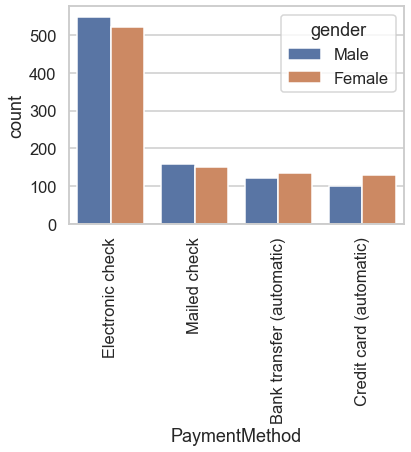

In [41]:
plt.xticks(rotation=90)
uniplot(churn_df_yes,"PaymentMethod","sfa",hue="gender")

In [42]:
#df_dummies.to_csv("churn_new.csv")